In [5]:
from scipy import misc
import glob
from skimage import io
from skimage.transform import resize
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
images = []

for image_path in glob.glob("dane/set0/*.png"):
    image = io.imread(image_path, as_gray=True)
    images.append(image)

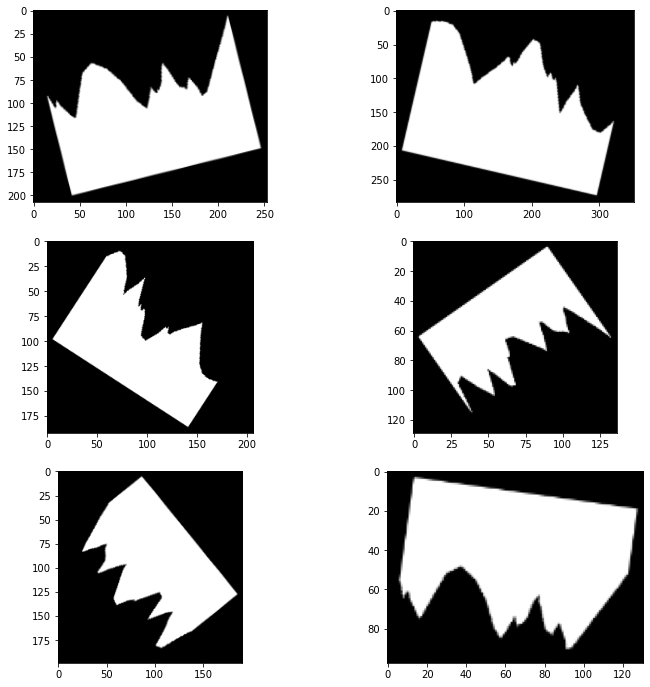

In [7]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

for index, image in enumerate(images):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 


In [8]:
numpyImages = []
for image in images:
    numpyImages.append(np.array(image))

In [9]:
def centerOfMass(image):
    SumX = 0
    SumY = 0
    num  = 0
    
    imageWidth, imageHeight = image.shape
    
    for i in range(imageWidth):
        for j in range(imageHeight):
            SumX += i * image[i,j]
            SumY += j * image[i,j]
            num += image[i,j]


    SumX = SumX / num;
    SumY = SumY / num;
    # The coordinate (SumX,SumY) is the center of the image mass
    return (SumX,SumY)


In [19]:
import imageio as iio
from skimage import filters
from skimage.measure import regionprops

from skimage.measure import find_contours


In [11]:
def centerOfMass2(image):
    threshold_value = filters.threshold_otsu(image)
    labeled_foreground = (image > threshold_value).astype(int)
    properties = regionprops(labeled_foreground, image)
    center_of_mass = properties[0].centroid
    weighted_center_of_mass = properties[0].weighted_centroid

    return center_of_mass

In [12]:
def centerOfMass3(image):
    X, Y = image.shape
    m = np.zeros((X, Y))
    for x in range(X):
        for y in range(Y):
            m[x, y] = all(image[x, y] != (0, 0, 0))
    m = m / np.sum(np.sum(m))


    dx = np.sum(m, 1)
    dy = np.sum(m, 0)

    cx = np.sum(dx * np.arange(X))
    cy = np.sum(dy * np.arange(Y))
    
    return (cx, cy)

In [13]:
centers = []
for image in numpyImages:
    centers.append(centerOfMass3(image))

In [14]:
centers

[(123.02090545938748, 130.5975588104749),
 (158.69839988100046, 157.56146539450432),
 (102.81453037401123, 88.44697027878047),
 (54.50931899641577, 61.982974910394276),
 (93.30793272808454, 103.22890311058175),
 (41.1828231292517, 66.03287981859413)]

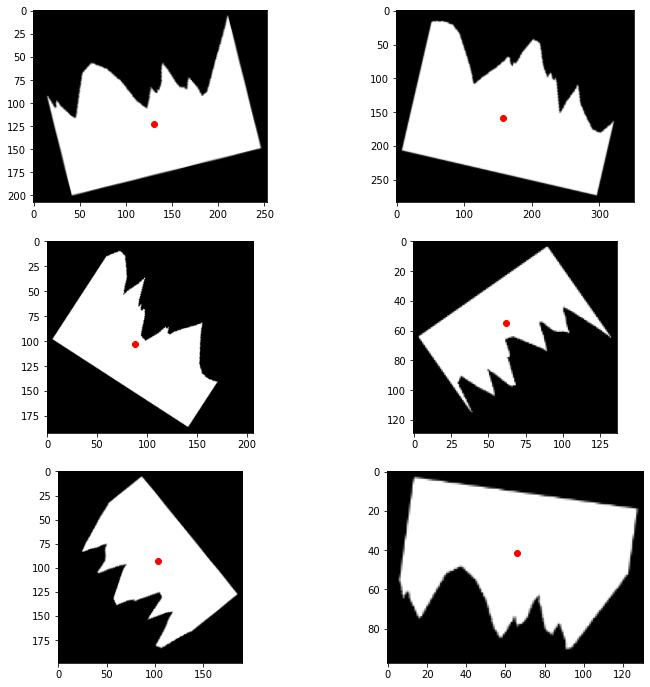

In [15]:
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center in zip(numpyImages, centers):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    index += 1

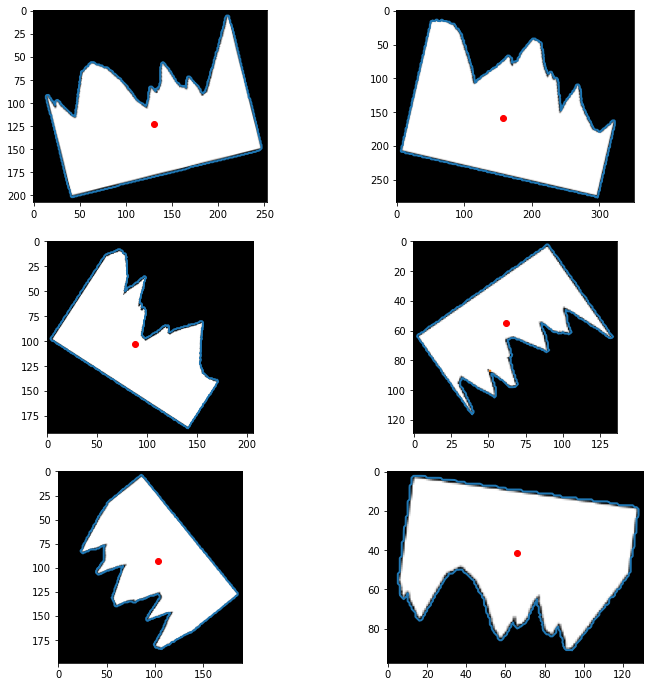

In [20]:


contours = []



for image in numpyImages:    
    contours.append(find_contours(image,0.5))

    
fig, axs = plt.subplots(3,2, figsize=(12,12))

index = 0

for image, center, contour in zip(numpyImages, centers, contours):
    axs[math.floor(index / 2),index % 2].imshow(image, cmap='gray', vmin=0, vmax=255) 
    axs[math.floor(index / 2),index % 2].scatter(center[1],center[0],color='r')
    for n, cnt in enumerate(contour):
        axs[math.floor(index / 2),index % 2].plot(cnt[:, 1], cnt[:, 0], linewidth=2)
    index += 1  
    


In [ ]:
#plan
# zrobić histogram tak jak na wykładzie
# sprawidzić wyniki
# jak nie będą wystarczajaco dobre, to obrócić i znormalizować (wielkosć) obrazki
# Sprawdzić jak działaja momenty HU
# można zrobic regresję liniową na punktach skrajnych (wierzchołki i doliny) i je porównywać


In [21]:
contours[0]

[array([[201.5       ,  43.        ],
        [201.9       ,  42.        ],
        [201.875     ,  41.        ],
        ...,
        [200.99444444,  44.        ],
        [201.        ,  43.5       ],
        [201.5       ,  43.        ]])]

In [31]:
pixelContours = []

neighborhood = [(-1,-1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

for image in numpyImages[:1]:
    for column, line in enumerate(image):
        for row, pixel in enumerate(line):
            blackPixels = 0
            if(pixel == 0):
                continue
            for x,y in neighborhood:
                try:
                    if image[row + x, column + y] == 0:
                        blackPixels += 1
                        break
                except:
                    pass
            if(blackPixels > 0):
                pixelContours.append([row, column])
                
            

In [32]:
pixelContours

[[208, 8],
 [208, 9],
 [208, 10],
 [208, 11],
 [207, 12],
 [208, 12],
 [207, 13],
 [208, 13],
 [207, 14],
 [208, 14],
 [207, 15],
 [208, 15],
 [207, 16],
 [208, 16],
 [206, 17],
 [207, 17],
 [208, 17],
 [206, 18],
 [207, 18],
 [208, 18],
 [206, 19],
 [207, 19],
 [208, 19],
 [206, 20],
 [207, 20],
 [208, 20],
 [205, 21],
 [206, 21],
 [207, 21],
 [208, 21],
 [205, 22],
 [206, 22],
 [207, 22],
 [208, 22],
 [204, 23],
 [205, 23],
 [206, 23],
 [207, 23],
 [208, 23],
 [204, 24],
 [205, 24],
 [206, 24],
 [207, 24],
 [208, 24],
 [204, 25],
 [205, 25],
 [206, 25],
 [207, 25],
 [208, 25],
 [204, 26],
 [205, 26],
 [206, 26],
 [207, 26],
 [208, 26],
 [204, 27],
 [205, 27],
 [206, 27],
 [207, 27],
 [208, 27],
 [204, 28],
 [205, 28],
 [206, 28],
 [207, 28],
 [208, 28],
 [203, 29],
 [204, 29],
 [205, 29],
 [206, 29],
 [207, 29],
 [208, 29],
 [203, 30],
 [204, 30],
 [205, 30],
 [206, 30],
 [207, 30],
 [208, 30],
 [202, 31],
 [203, 31],
 [204, 31],
 [205, 31],
 [206, 31],
 [207, 31],
 [208, 31],
 [202,

TypeError: Invalid shape (1, 1129, 2) for image data

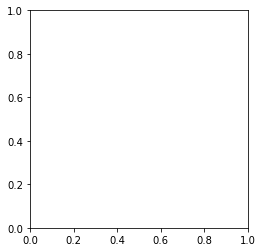

In [35]:
plt.imshow(contours[0], cmap='gray', interpolation='nearest')
plt.figure()